In [ ]:
# --- Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive to access its contents


Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import cv2
from IPython.display import display, Image
import ipywidgets as widgets
from IPython.display import clear_output

In [ ]:

image_folder = "/content/drive/MyDrive/Hexcel_Company_Project/Classifier_Training_Data_Cropped_coins"
csv_path = "/content/drive/MyDrive/Hexcel_Company_Project/Classifier_coin_labels__.csv"


In [ ]:
image_files = sorted([f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
df = pd.DataFrame(columns=['filename', 'uk', 'denomination', 'side', 'quality', 'shape', 'Color'])


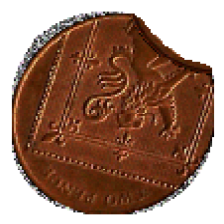

In [ ]:

#  Widgets
uk_widget = widgets.Dropdown(options=['', 'yes', 'no'], description='UK:')
denom_widget = widgets.Dropdown(
    options=['', '1p', '2p', '5p', '10p', '20p', '50p', '£1', '£2', 'Unknown'],
    description='Value:'
)
side_widget = widgets.Dropdown(options=['', 'heads', 'tails'], description='Side:')
quality_widget = widgets.Dropdown(options=['', 'high','low'], description='Quality:')
shape_widget = widgets.Dropdown(options=['', 'full', 'partial'], description='Shape:')
color_widget = widgets.Dropdown(options=['', 'Copper', 'steel', 'bimetallic'], description='Color:')
next_button = widgets.Button(description='Next')

label_widgets = widgets.VBox([uk_widget, denom_widget, side_widget, quality_widget, shape_widget,color_widget, next_button])

index = 0

def show_next(_):
    global index

    if index < len(image_files):
        # ssave previous label before moving on
        if index > 0:
            df.loc[len(df)] = [
                image_files[index - 1],
                uk_widget.value,
                denom_widget.value,
                side_widget.value,
                quality_widget.value,
                shape_widget.value,
                color_widget.value
            ]
            df.to_csv(csv_path, index=False)

        clear_output(wait=True)
        file = image_files[index]
        img_path = os.path.join(image_folder, file)
        display(Image(filename=img_path, width=300))
        display(label_widgets)

        uk_widget.value = ''
        denom_widget.value = ''
        side_widget.value = ''
        quality_widget.value = ''
        shape_widget.value = ''
        color_widget.value = ''

        index += 1
    else:
        df.loc[len(df)] = [
            image_files[index - 1],
            uk_widget.value,
            denom_widget.value,
            side_widget.value,
            quality_widget.value,
            shape_widget.value,
            color_widget.value


        ]
        #df.to_csv(csv_path, index=False)
        df.to_csv(csv_path, index=False, encoding='utf-8')
        clear_output(wait=True)
        print(" Labeling complete!")

next_button.on_click(show_next)
show_next(None)
